# This notebook addressed questions related to how TgF344-AD rats and F344 controls interact with the proximal cue. 

### The following questions will be addressed: 

* Do TgF344-AD rats interact with the proximal cue to a similar extent as F344 controls? 
    * Are there velocity differences? 
    * Do they spend a similar amount of time near the cue? 
    * Are they relatively close to the cue? 

* Do TgF344-AD rats visit the cue in a similar time frame relative to F344 controls? 
    * How long does it take each group to visit the cue? i.e. do TG rats get to the cue faster than controls? 



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import researchpy as rp
import statsmodels.formula.api as sm
import scipy.stats as stats
import dabest


In [2]:
flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def check_assumptions(df,var):
    # Gettin summary statistics
    print(rp.summary_cont(df[var]))
    # Build ANOVA model 
    ols_resid = sm.ols(var+'~ group',data = df).fit()
    # Test assumption of normality for residuals 
    print(stats.shapiro(ols_resid.resid))
    # Test homogeneity of Variance test
    print(stats.levene(df[var][df['group'] == 'tg'], df[var][df['group'] == 'wt']))


## Load Datasets

In [3]:
## Data is located in stop_metrics_mixed_models.csv and movement_metrics_mixed models.csv
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df_stop = pd.read_csv(data_path+'stop_metrics_mixed_models.csv')
df_stop = df_stop[df_stop.day=='D1']
df_stop = df_stop.set_index('subID')

df_run = pd.read_csv(data_path+'movement_metrics_mixed models.csv')
df_run = df_run[df_run.day=='D1']
df_run.drop(['cue_bearing', 'length','circuity'], axis=1)

df_t2cue = pd.read_csv(data_path+'time_2_cue.csv')
df_t2cue = df_t2cue[df_t2cue.day=='D1']


## What proportion of animals visited the cue at least once?



In [54]:
print(np.sum(np.isnan(df_t2cue['time_2_cue'][df_t2cue['group'] == 'tg']))/len(np.isnan(df_t2cue['time_2_cue'][df_t2cue['group'] == 'tg'])))
print(np.sum(np.isnan(df_t2cue['time_2_cue'][df_t2cue['group'] == 'wt']))/len(np.isnan(df_t2cue['time_2_cue'][df_t2cue['group'] == 'wt'])))

df_t2cue = df_t2cue.dropna(axis = 0)

0.25
0.25


## How long did it take animals to visit the cue location?

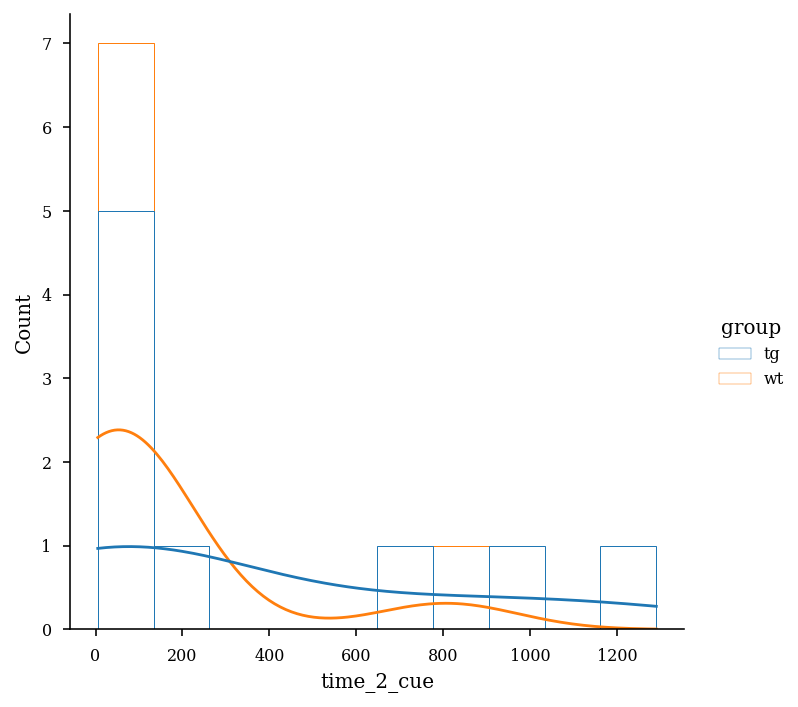



     Variable     N      Mean        SD       SE  95% Conf.  Interval
0  time_2_cue  18.0  250.4111  392.4329  92.4973    55.2588  445.5634
ShapiroResult(statistic=0.8087422847747803, pvalue=0.0020238077268004417)
LeveneResult(statistic=1.8265909074007496, pvalue=0.19533099282087676)
KruskalResult(statistic=0.43859649122806843, pvalue=0.5078006482752742)
Median time to cue was 87.2333333333333  seconds for TgF344-AD rats
Median time to cue was 59.4333333333333  seconds for F344 rats


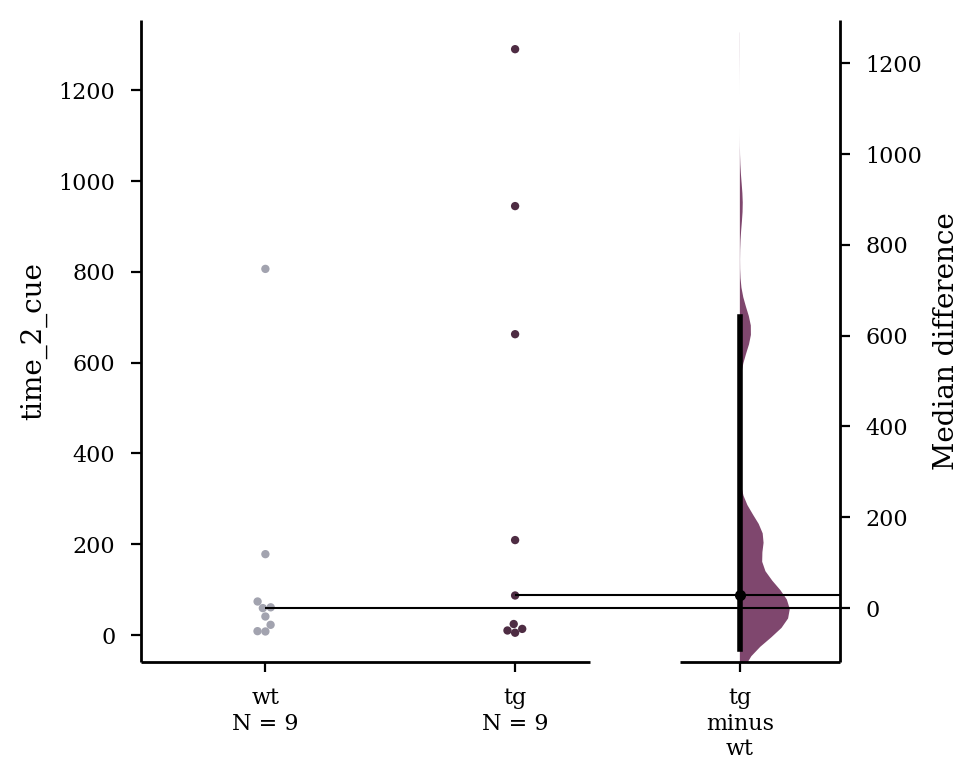

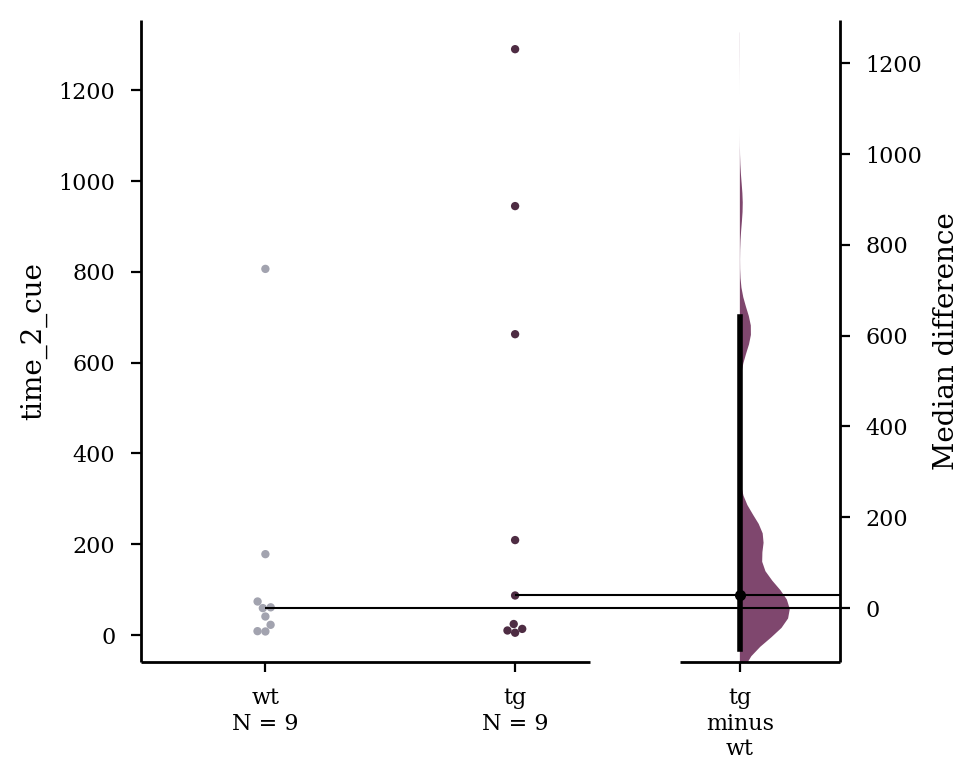

In [59]:
sns.displot(df_t2cue, x="time_2_cue",hue="group", kde=True,fill=False)
plt.show()
# check parametric assumptions of normality and equal variance
check_assumptions(df_t2cue,"time_2_cue")

# Normality is not met, lets run a KS given distributions are similar
print(stats.kruskal(df_t2cue['time_2_cue'][df_t2cue['group'] == 'tg'], df_t2cue['time_2_cue'][df_t2cue['group'] == 'wt']))

# print medians
print('Median time to cue was',np.median(df_t2cue['time_2_cue'][df_t2cue['group'] == 'tg']),' seconds for TgF344-AD rats' )
print('Median time to cue was',np.median(df_t2cue['time_2_cue'][df_t2cue['group'] == 'wt']),' seconds for F344 rats' )

dabest_obj = dabest.load(df_t2cue, idx=("wt","tg"),x="group", y="time_2_cue")
dabest_obj.median_diff.plot(custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
# axs[5].set_ylabel("time to cue (sec)")


## Plot stop proximity distributions between groups

Index(['subID', 'group', 'day', 'stop_time', 'stop_cue_proximity',
       'inter_stop_interval', 'stop_start_time'],
      dtype='object')


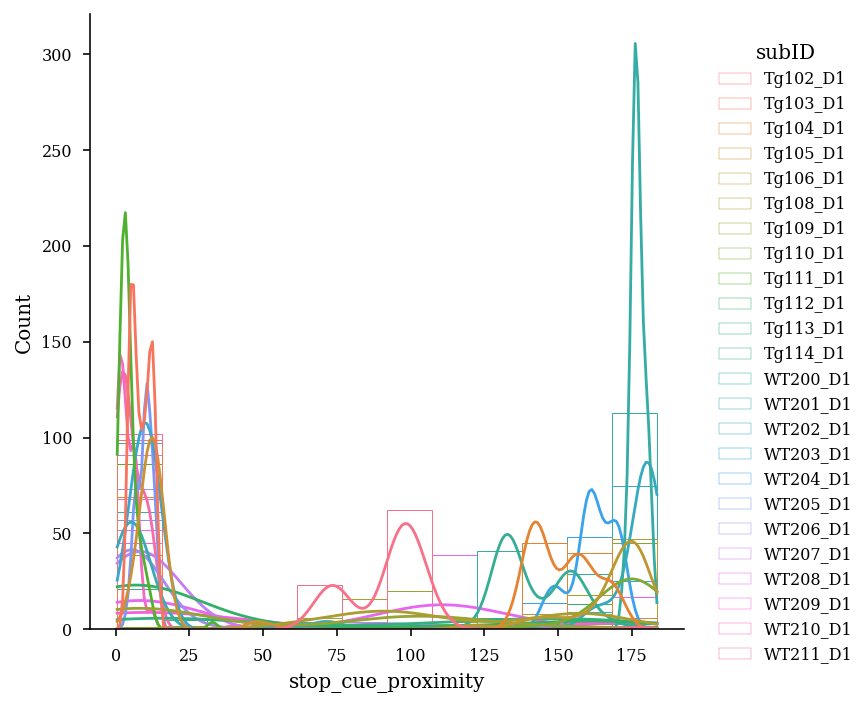

In [73]:
print(df_stop.keys())

sns.displot(df_stop, x="stop_cue_proximity",hue="subID", kde=True,fill=False)
plt.show()

The above density plot shows the proximity of all stops to the cue boundary. Note the bimodal distribution, indicating some rats explore the cue more than other rats. Given that cue exploration occurs within the first three minutes of the task start, what is the relationship between stop proximity to cue and time of stop in task?

## Plot scatter to show time of stop and proximity of stop across rats 


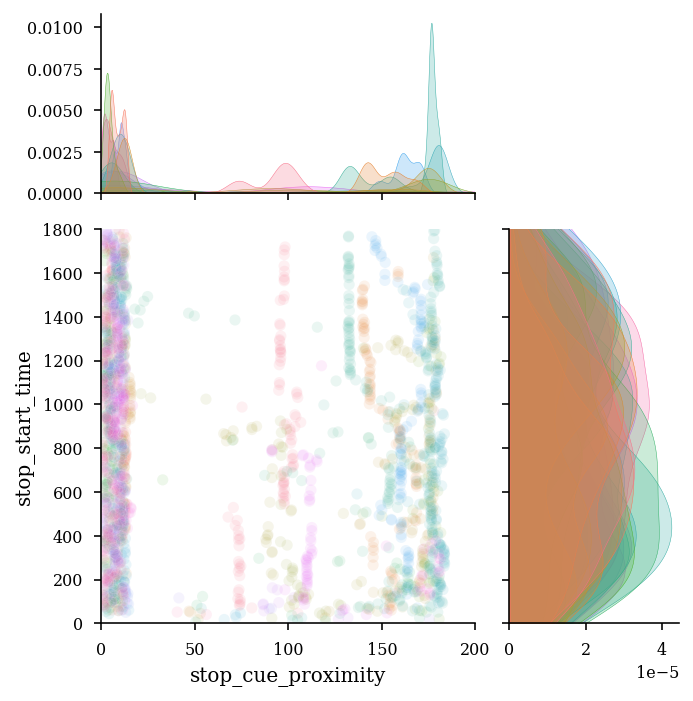

In [82]:
fig = sns.jointplot(data=df_stop, 
                    x="stop_cue_proximity", 
                    y="stop_start_time",
                    hue="subID", 
                    height=5, ratio=2, 
                    marginal_ticks=True,
                    legend=False,
                    alpha = .1,
                   xlim = [0,200],
                   ylim = [0,1800])


The above plot shows the relationship between when the rat stopped (y) and the proximity of that stop to the cue (x). We find that stops that were close to the cue occured throughout the session as shown by the dense distribution of stop made from the start of the session to the end of the seesion (1800 seconds. Noteably, several rats made stops far from the cue throughout the duration of session. Its possible that rats that didn't visit the cue belong in that category. Lets remove the stop data from rats that didn't visit the cue, and replot the figure. 

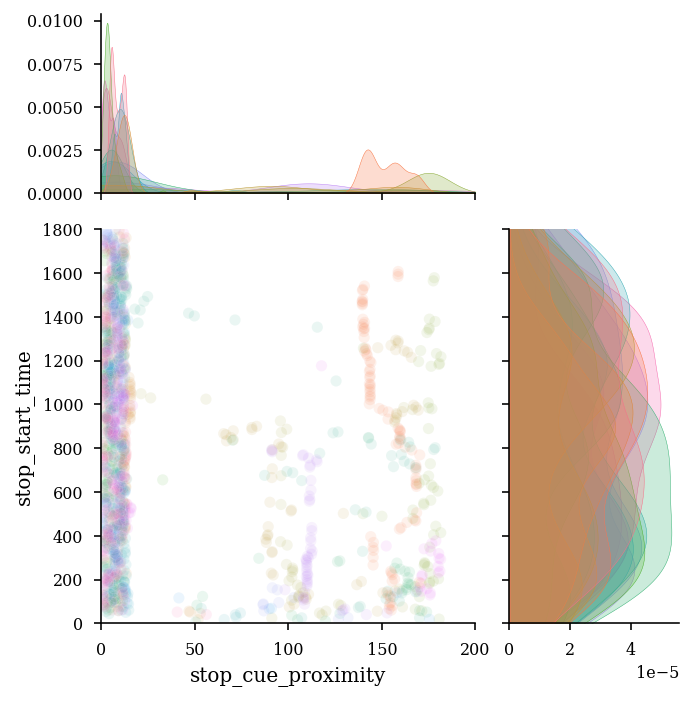

In [13]:
# Load data again since we removed the nans for the analysis above. 
df_t2cue = pd.read_csv(data_path+'time_2_cue.csv')
df_t2cue = df_t2cue[df_t2cue.day=='D1']

# find subID of animals that didn't visit the cue 
no_cue_visit_ids = df_t2cue['subID'][np.isnan(df_t2cue['time_2_cue'])]

# Remove those subjects from df_stop
df_stop_cue_visits = df_stop.drop(no_cue_visit_ids,axis = 0)

fig = sns.jointplot(data=df_stop_cue_visits, 
                    x="stop_cue_proximity", 
                    y="stop_start_time",
                    hue="subID", 
                    height=5, ratio=2, 
                    marginal_ticks=True,
                    legend=False,
                    alpha = .1,
                   xlim = [0,200],
                   ylim = [0,1800])

Removing stops from animals that didn't visit the cue show that preference for stopping further from the cue are less frequent. However, two rats (orange and lime green distributions) still show preference for stopping away from the cue location, despite having already stopped near the cue. This may indicate these animals did not use the cue as a reference point for exploration (i.e. established a home base near the cue). 

## Time to the proximal cue location

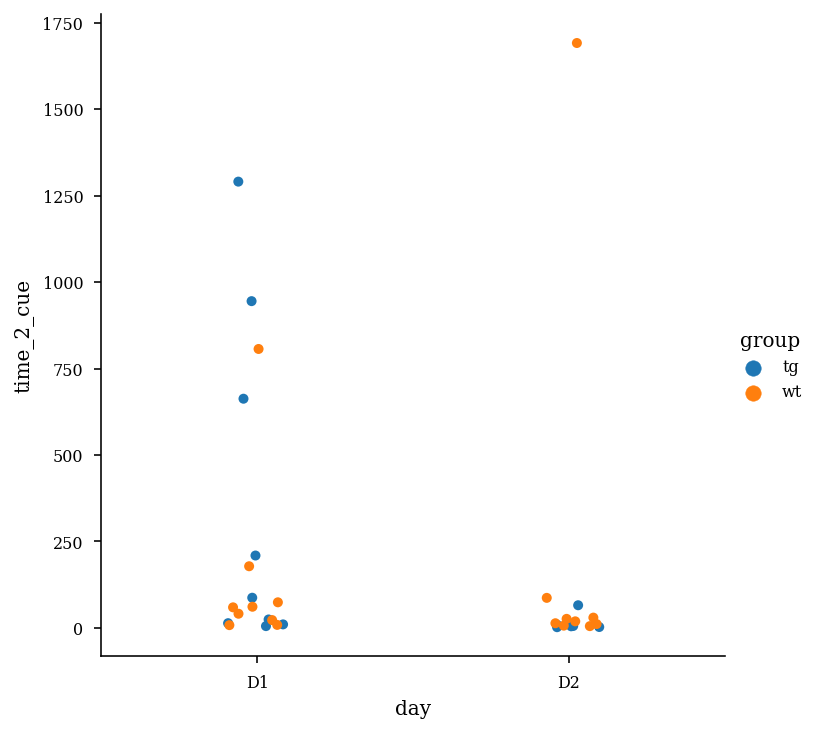

In [31]:
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df_stop = pd.read_csv(data_path+'stop_metrics_mixed_models.csv')
df_t2cue = pd.read_csv(data_path+'time_2_cue.csv')

sns.catplot(x="day", y="time_2_cue", hue="group", data=df_t2cue)

# sns.pairplot(df_t2cue, hue='day')

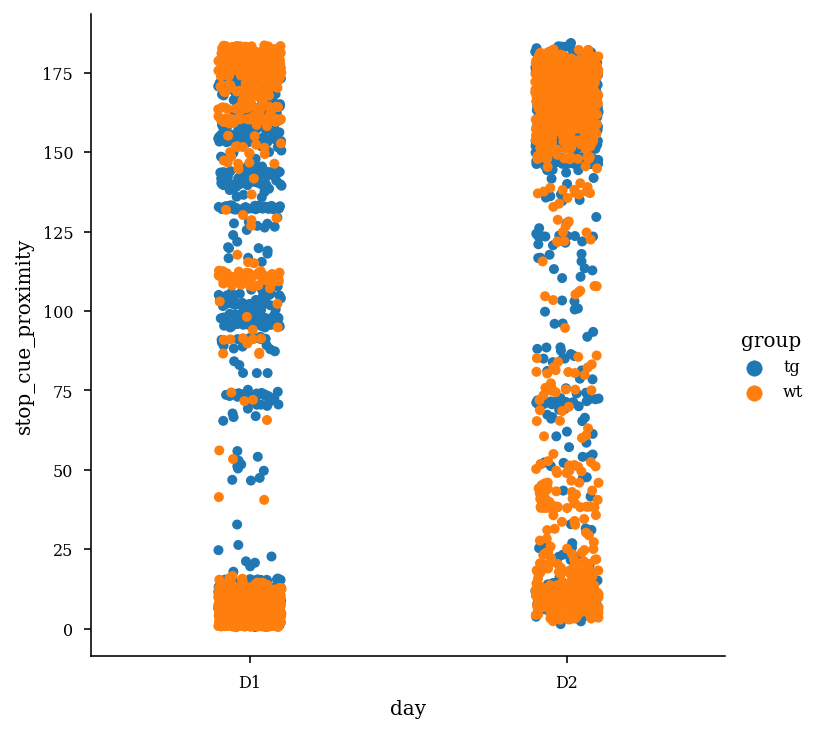

In [32]:
sns.catplot(x="day", y="stop_cue_proximity", hue="group", data=df_stop)


In [36]:
df_stop.head()

,subID,group,day,stop_id,stop_time,stop_cue_proximity,inter_stop_interval,stop_start_time
0,Tg102,tg,D1,1,3.266667,105.057692,NaN,46.850000
1,Tg102,tg,D1,2,4.366667,80.456669,22.033333,70.650000
2,Tg102,tg,D1,3,2.800000,73.789757,11.166667,82.016667
3,Tg102,tg,D1,4,9.266667,74.080866,11.266667,86.816667
4,Tg102,tg,D1,5,3.733333,74.216292,6.766667,97.950000


In [34]:
np.sum(df_stop.stop_cue_proximity < 25)
    

1505

In [59]:
temp_df = df_stop[df_stop["stop_cue_proximity"] < 25.]

for stop in df_stop:
    
occur = temp_df.groupby(['subID','day']).size()
occur.iloc[np.isnan(occur),] = 0.
print(occur)

AssertionError: 

## Given the distributions are bimodal, separate stops by proximity (using threshold) and perform glmer to see if proportion of close stops near cue is different between groups.

We need to do this in R using lme4 package. 

## Keep epochs of velocity and inter-stop-interval when the animals are near the cue location. 
### i.e. Given they are close to the cue, how does their behavior differ p(behavior | close to cue)


## Linear mixed model for velocity and duration 